In [2]:
from pathlib import Path

ROOT = Path.cwd()
while ROOT != ROOT.parent and not (ROOT / "data").exists() and not (ROOT / ".git").exists():
    ROOT = ROOT.parent

print("ROOT =", ROOT)


ROOT = c:\Users\patxi\Documents\GitHub\bicing-barcelona-ml


In [ ]:
!pip install -U pandas pyarrow matplotlib duckdb


  Using cached pandas-3.0.0-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached duckdb-1.4.4-cp312-cp312-win_amd64.whl.metadata (4.3 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-3.0.0-cp312-cp312-win_amd64.whl (9.7 MB)
Using cached duckdb-1.4.4-cp312-cp312-win_amd64.whl (12.3 MB)
Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)

   ---------------------------------------- 0/3 [tzdata]
   ---------------------------------------- 0/3 [tzdata]
   ---------------------------------------- 0/3 [tzdata]
   ------------- -------------------------- 1/3 [duckdb]
   ------------- -------------------------- 1/3 [duckdb]
   ------------- -------------------------- 1/3 [duckdb]
   ------------- -------------------------- 1/3 [duckdb]
   ------------- -------------------------- 1/3 [duckdb]
   ------------- -------------------------- 1/3 [duckdb]
   ------------- -------------------------- 1/3 [duckdb]
   ------------- ---------------------

In [3]:
from pathlib import Path
print("CWD =", Path.cwd())
print("data exists here? =", (Path.cwd() / "data").exists())


CWD = c:\Users\patxi\Documents\GitHub\bicing-barcelona-ml\data
data exists here? = False


In [4]:
!pip install matplotlib tabulate


In [6]:
from pathlib import Path
import pandas as pd

ROOT = Path.cwd().resolve()

# Subimos hasta encontrar /data o /.git (raíz del proyecto)
while ROOT != ROOT.parent and not (ROOT / "data").exists() and not (ROOT / ".git").exists():
    ROOT = ROOT.parent

print("CWD :", Path.cwd())
print("ROOT:", ROOT)
print("data exists in ROOT?:", (ROOT / "data").exists())


ModuleNotFoundError: No module named 'pandas'

In [11]:
import sys
!"{sys.executable}" -m pip install -U pip
!"{sys.executable}" -m pip install pyarrow


  Using cached pyarrow-23.0.0-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
Using cached pyarrow-23.0.0-cp312-cp312-win_amd64.whl (27.7 MB)


In [15]:
import os
print("size bytes:", os.path.getsize(SAMPLE))
pf = pq.ParquetFile(SAMPLE)
print("rows:", pf.metadata.num_rows, "row_groups:", pf.num_row_groups)


NameError: name 'SAMPLE' is not defined

In [9]:
from pathlib import Path
import pandas as pd

ROOT = Path.cwd().resolve()
while ROOT != ROOT.parent and not (ROOT / "data").exists() and not (ROOT / ".git").exists():
    ROOT = ROOT.parent

print("CWD :", Path.cwd())
print("ROOT:", ROOT)
print("data exists in ROOT?:", (ROOT / "data").exists())


CWD : c:\Users\patxi\Documents\GitHub\bicing-barcelona-ml\data
ROOT: C:\Users\patxi\Documents\GitHub\bicing-barcelona-ml
data exists in ROOT?: True


In [10]:
SAMPLE = ROOT / "data" / "gold" / "samples" / "bicing_gold_final_sample_1M.parquet"
FIG_DIR = ROOT / "reports" / "figures"
TAB_DIR = ROOT / "reports" / "tables"

FIG_DIR.mkdir(parents=True, exist_ok=True)
TAB_DIR.mkdir(parents=True, exist_ok=True)

print("SAMPLE:", SAMPLE)
print("SAMPLE exists?:", SAMPLE.exists())


SAMPLE: C:\Users\patxi\Documents\GitHub\bicing-barcelona-ml\data\gold\samples\bicing_gold_final_sample_1M.parquet
SAMPLE exists?: True


In [11]:
import pyarrow.parquet as pq

table = pq.read_table(SAMPLE)
df = table.to_pandas()

df["time_hour"] = pd.to_datetime(df["time_hour"])
df["date"] = pd.to_datetime(df["date"])

print("shape:", df.shape)
print("time_hour:", df["time_hour"].min(), "->", df["time_hour"].max())
print("stations:", df["station_id"].nunique())


shape: (1000000, 21)
time_hour: 2019-03-28 18:00:00 -> 2025-12-31 23:00:00
stations: 555


In [12]:
dup_keys = df.duplicated(["station_id", "time_hour"]).sum()
print("dup_keys(sample):", dup_keys)

nulls = df.isna().sum().sort_values(ascending=False).head(10)
print("\nTop nulls:\n", nulls)

# flags típicas
print("\nFlags:")
print("time_hour fuera de rango 2019-2025:", ((df["time_hour"].dt.year < 2019) | (df["time_hour"].dt.year > 2025)).sum())
print("bikes_available_mean < 0:", (df["bikes_available_mean"] < 0).sum())
print("docks_available_mean < 0:", (df["docks_available_mean"] < 0).sum())


dup_keys(sample): 0

Top nulls:
 lag_24h_bikes           32449
lag_1h_bikes              103
bikes_available_mean        0
time_hour                   0
station_id                  0
mechanical_mean             0
docks_available_mean        0
ebike_mean                  0
obs_count                   0
month                       0
dtype: int64

Flags:
time_hour fuera de rango 2019-2025: 0
bikes_available_mean < 0: 3
docks_available_mean < 0: 0


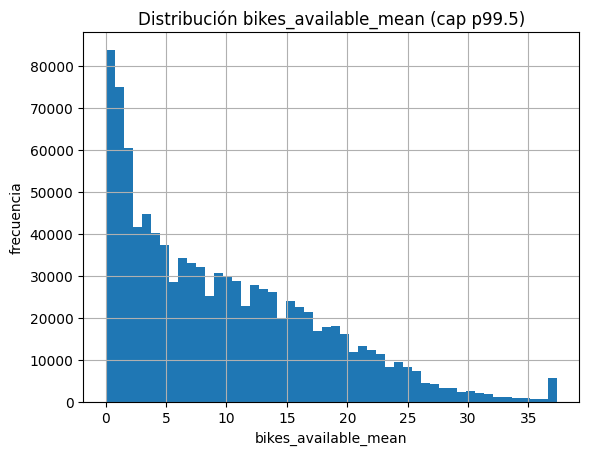

✅ C:\Users\patxi\Documents\GitHub\bicing-barcelona-ml\reports\figures\eda_hist_bikes_available_mean.png


In [13]:
import matplotlib.pyplot as plt

plt.figure()
df["bikes_available_mean"].clip(lower=0, upper=df["bikes_available_mean"].quantile(0.995)).hist(bins=50)
plt.title("Distribución bikes_available_mean (cap p99.5)")
plt.xlabel("bikes_available_mean")
plt.ylabel("frecuencia")
out = FIG_DIR / "eda_hist_bikes_available_mean.png"
plt.savefig(out, bbox_inches="tight", dpi=150)
plt.show()

print("✅", out)


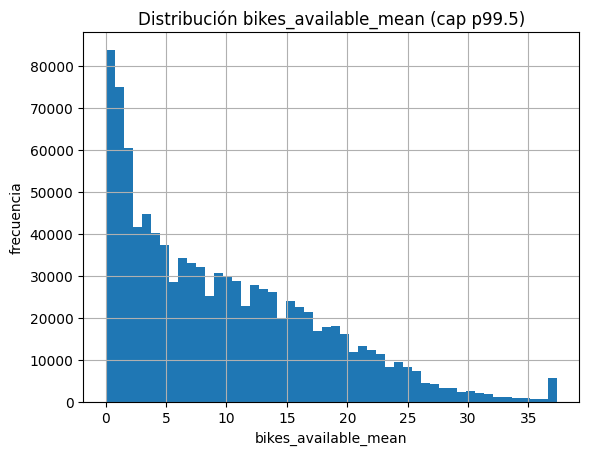

✅ C:\Users\patxi\Documents\GitHub\bicing-barcelona-ml\reports\figures\eda_hist_bikes_available_mean.png


In [14]:
import matplotlib.pyplot as plt

plt.figure()
df["bikes_available_mean"].clip(lower=0, upper=df["bikes_available_mean"].quantile(0.995)).hist(bins=50)
plt.title("Distribución bikes_available_mean (cap p99.5)")
plt.xlabel("bikes_available_mean")
plt.ylabel("frecuencia")
out = FIG_DIR / "eda_hist_bikes_available_mean.png"
plt.savefig(out, bbox_inches="tight", dpi=150)
plt.show()

print("✅", out)


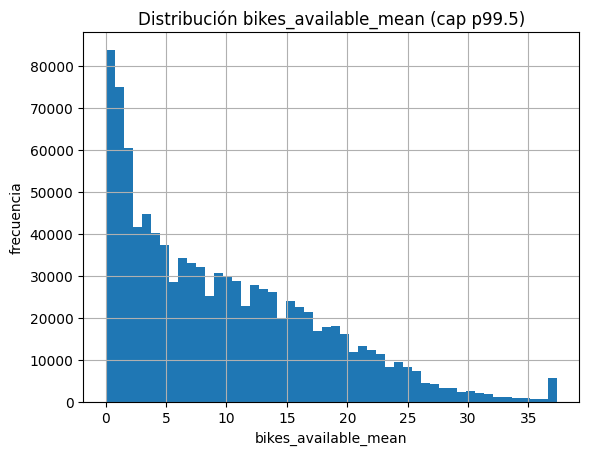

✅ C:\Users\patxi\Documents\GitHub\bicing-barcelona-ml\reports\figures\eda_hist_bikes_available_mean.png


In [15]:
import matplotlib.pyplot as plt

plt.figure()
df["bikes_available_mean"].clip(lower=0, upper=df["bikes_available_mean"].quantile(0.995)).hist(bins=50)
plt.title("Distribución bikes_available_mean (cap p99.5)")
plt.xlabel("bikes_available_mean")
plt.ylabel("frecuencia")
out = FIG_DIR / "eda_hist_bikes_available_mean.png"
plt.savefig(out, bbox_inches="tight", dpi=150)
plt.show()

print("✅", out)


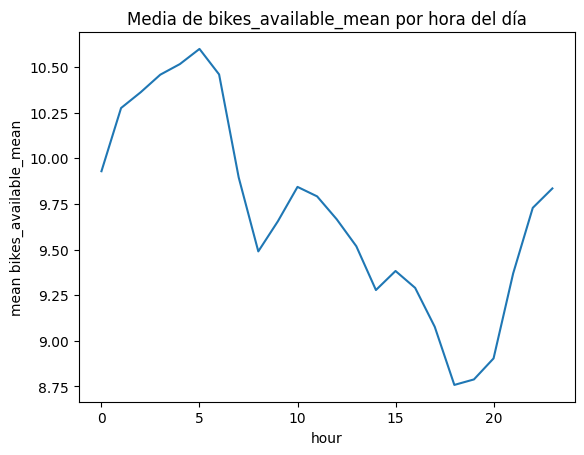

✅ C:\Users\patxi\Documents\GitHub\bicing-barcelona-ml\reports\figures\eda_line_mean_bikes_by_hour.png


In [16]:
plt.figure()
g = df.groupby("hour", as_index=False)["bikes_available_mean"].mean()
plt.plot(g["hour"], g["bikes_available_mean"])
plt.title("Media de bikes_available_mean por hora del día")
plt.xlabel("hour")
plt.ylabel("mean bikes_available_mean")
out = FIG_DIR / "eda_line_mean_bikes_by_hour.png"
plt.savefig(out, bbox_inches="tight", dpi=150)
plt.show()

print("✅", out)


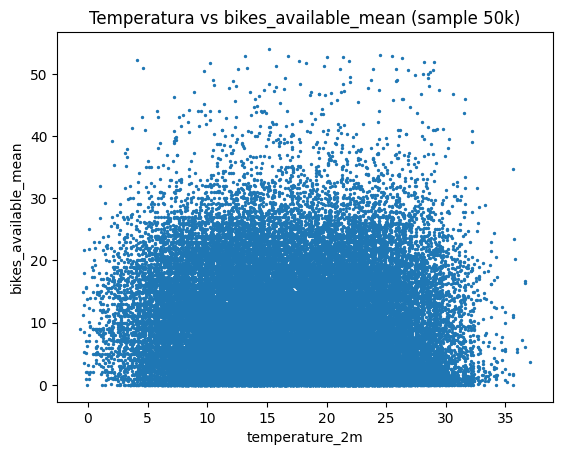

✅ C:\Users\patxi\Documents\GitHub\bicing-barcelona-ml\reports\figures\eda_scatter_temp_vs_bikes.png


In [17]:
plt.figure()
d2 = df.sample(50000, random_state=42)  # para que sea rápido
plt.scatter(d2["temperature_2m"], d2["bikes_available_mean"], s=2)
plt.title("Temperatura vs bikes_available_mean (sample 50k)")
plt.xlabel("temperature_2m")
plt.ylabel("bikes_available_mean")
out = FIG_DIR / "eda_scatter_temp_vs_bikes.png"
plt.savefig(out, bbox_inches="tight", dpi=150)
plt.show()

print("✅", out)


C:\Users\patxi\AppData\Local\Temp\ipykernel_26212\4081040018.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["no_holiday", "holiday"])


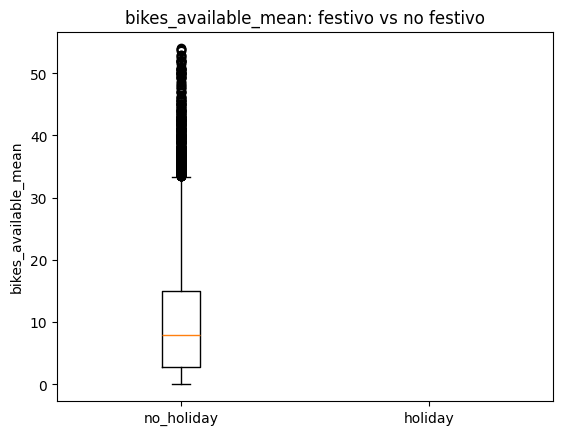

✅ C:\Users\patxi\Documents\GitHub\bicing-barcelona-ml\reports\figures\eda_box_bikes_holiday_vs_not.png


In [18]:
plt.figure()
data = [
    df.loc[df["is_holiday"] == 0, "bikes_available_mean"].sample(50000, random_state=1),
    df.loc[df["is_holiday"] == 1, "bikes_available_mean"].sample(min(50000, (df["is_holiday"] == 1).sum()), random_state=1),
]
plt.boxplot(data, labels=["no_holiday", "holiday"])
plt.title("bikes_available_mean: festivo vs no festivo")
plt.ylabel("bikes_available_mean")
out = FIG_DIR / "eda_box_bikes_holiday_vs_not.png"
plt.savefig(out, bbox_inches="tight", dpi=150)
plt.show()

print("✅", out)
